In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# utils functions


In [3]:
def analyze_video(path):
    cap = cv2.VideoCapture(path)
    # Check if camera opened successfully
    if (cap.isOpened()== False): 
        print("Error opening video stream or file")

    timestamp = 0
    intensity = []
    # Read until video is completed
    while(cap.isOpened()):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret == True:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            intensity.append(cv2.mean(gray)[0]) # grayscale is one dimensional so take the first element
            # Display the resulting frame
            # cv2.imshow('Frame',frame)

            # Press Q on keyboard to  exit
            # if cv2.waitKey(25) & 0xFF == ord('q'):
            #   break
            timestamp = timestamp + 1
        # Break the loop
        else: 
            break
    metadata = {
        'frame_count': cap.get(cv2.CAP_PROP_FRAME_COUNT),
        'fps': cap.get(cv2.CAP_PROP_FPS)
    }
    # When everything done, release the video capture object
    cap.release()

    # Closes all the frames
    cv2.destroyAllWindows()

    return [range(1, timestamp+1), intensity, metadata]

def show(x, y, xlabel, ylabel):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

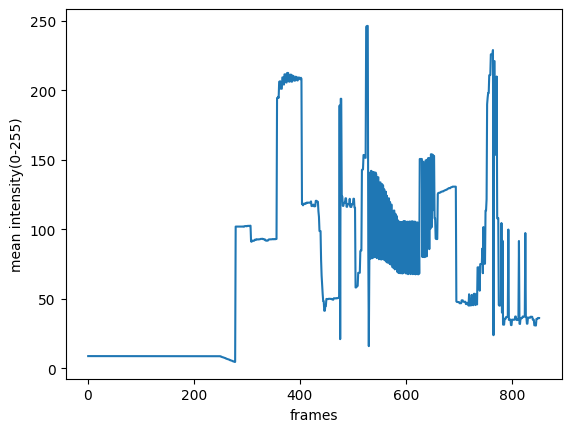

In [4]:
x, y, metadata = analyze_video('videos/pokemon_deleted_scene.mp4')
start = 0
show(x[start:], y[start:], 'frames', 'mean intensity(0-255)')

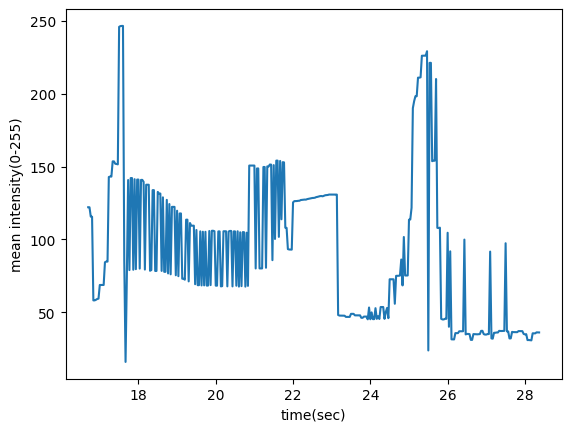

28.366666666666667

In [16]:
start = 500
x_arr = np.array(x)
time = x_arr / metadata['fps']
show(time[start:], y[start:], 'time(sec)', 'mean intensity(0-255)')
time[-1]

In [18]:
diff = []
sd = np.std(y)
for i in range(len(y)-1):
    diff.append(1 if abs(y[i] - y[i+1]) > 30 else 0)
diff.append(0) # adjust shape for plotting
sd

61.550448471164486

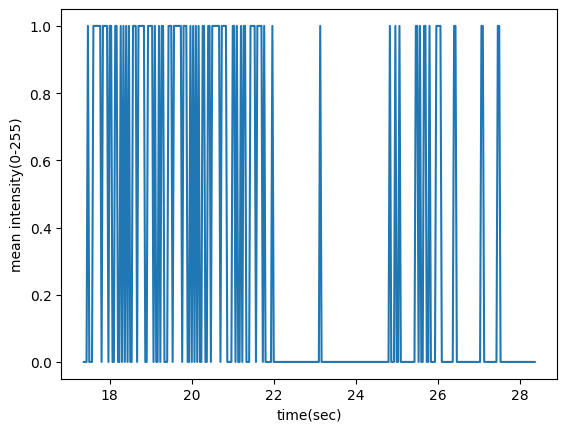

In [19]:
# TODO: this is not accurate, flashes are too disperse idk why
df = pd.DataFrame(diff, columns=['values'])
# df['values'].replace(to_replace = 0, value = pd.NA, inplace=True)
start = 520
show(time[start:], diff[start:], 'time(sec)', 'mean intensity(0-255)')